# Second order visualizations
Test code for generating second order visualizations of desired sites and exporting to a folder. Exports rFon1, rFon1D barplots and rFon2D heatmaps.

Last updated: Wednesday July 27, 2022

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import comb
from os.path import exists

## User Input (specific to dataset of interest)
This first box is all that you need to adjust.

In [135]:
# file information
data_file_prefix = "amyloid_gk_nostop"
ortho_seq_file_prefix = "gk_charge_second"

# location information
run_location = "local"  # or server. where are you running the code?
ortho_results_location = (
    "server"  # or local (are the ortho_seqs results in local or server?)
)

# dataset information
n_sites = 7
dims = ["neg", "pos", "z", "n"]
n_dim = len(dims)
site_desc = "Gatekeeper sites"  # how you want the x-axis of the sites to be labeled
phenotype = "nscore"

In [136]:
if run_location == "local":
    ortho_dir = "/Users/olivia.yoo/Desktop/code/ortho_seqs/"
elif run_location == "server":
    ortho_dir = "/hpc/projects/data_lg/olivia.yoo/ortho_seqs/"
else:
    print(
        "Specify the location where you're running this code as either local or server in the run_location variable."
    )

print(ortho_dir)
print(f"Path to the ortho_seqs directory exists: {exists(ortho_dir)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/
Path to the ortho_seqs directory exists: True


In [137]:
# TODO: CREATE OUT_DIR WITH UTILS FUNCTION
out_dir = (
    ortho_dir
    + "amyloid_beta/"
    + run_location
    + "_ortho_seq_results/"
    + ortho_seq_file_prefix
    + "_viz/"
)
print(out_dir)
print(f"Path to the ortho_seqs directory exists: {exists(out_dir)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/local_ortho_seq_results/gk_charge_second_viz/
Path to the ortho_seqs directory exists: True


## Import data
Looking at what's inside all of the numpy files generated by running the second order orthogonal-polynomial command.

In [138]:
data_path = (
    ortho_dir
    + "amyloid_beta/"
    + ortho_results_location
    + "_ortho_seq_results/"
    + ortho_seq_file_prefix
    + "/"
)
print(data_path)
print(f"Path to the ortho_seqs results (data) directory exists: {exists(data_path)}")

/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/gk_charge_second/
Path to the ortho_seqs results (data) directory exists: True


In [139]:
calculations = np.load(data_path + data_file_prefix + ".npz")
lst = calculations.files
for item in lst:
    print(item)

amyloid_gk_nostop_mean
amyloid_gk_nostop_P
amyloid_gk_nostop_var
amyloid_gk_nostop_cov
amyloid_gk_nostop_reg11
amyloid_gk_nostop_Pa
amyloid_gk_nostop_P1i1
amyloid_gk_nostop_varP1i1
amyloid_gk_nostop_cov11i1
amyloid_gk_nostop_reg11i1
amyloid_gk_nostop_Pa1i1
amyloid_gk_nostop_P1D
amyloid_gk_nostop_varP1D
amyloid_gk_nostop_phi2
amyloid_gk_nostop_phi2m
amyloid_gk_nostop_Q2
amyloid_gk_nostop_cov2w1
amyloid_gk_nostop_cov2w1a
amyloid_gk_nostop_cov2w1b
amyloid_gk_nostop_r2on1a
amyloid_gk_nostop_r2on1b
amyloid_gk_nostop_P2
amyloid_gk_nostop_P2a
amyloid_gk_nostop_cov2w2
amyloid_gk_nostop_var2
amyloid_gk_nostop_reg2on2
amyloid_gk_nostop_P2i2
amyloid_gk_nostop_P2i2a
amyloid_gk_nostop_cov2w2i2
amyloid_gk_nostop_var2i2
amyloid_gk_nostop_reg2on2i2
amyloid_gk_nostop_P2D
amyloid_gk_nostop_P2Da
amyloid_gk_nostop_var2D


In [140]:
calculations = np.load(data_path + "amyloid_gk_nostop.npz")

lst = calculations.files

for item in lst:
    print(item)

amyloid_gk_nostop_mean
amyloid_gk_nostop_P
amyloid_gk_nostop_var
amyloid_gk_nostop_cov
amyloid_gk_nostop_reg11
amyloid_gk_nostop_Pa
amyloid_gk_nostop_P1i1
amyloid_gk_nostop_varP1i1
amyloid_gk_nostop_cov11i1
amyloid_gk_nostop_reg11i1
amyloid_gk_nostop_Pa1i1
amyloid_gk_nostop_P1D
amyloid_gk_nostop_varP1D
amyloid_gk_nostop_phi2
amyloid_gk_nostop_phi2m
amyloid_gk_nostop_Q2
amyloid_gk_nostop_cov2w1
amyloid_gk_nostop_cov2w1a
amyloid_gk_nostop_cov2w1b
amyloid_gk_nostop_r2on1a
amyloid_gk_nostop_r2on1b
amyloid_gk_nostop_P2
amyloid_gk_nostop_P2a
amyloid_gk_nostop_cov2w2
amyloid_gk_nostop_var2
amyloid_gk_nostop_reg2on2
amyloid_gk_nostop_P2i2
amyloid_gk_nostop_P2i2a
amyloid_gk_nostop_cov2w2i2
amyloid_gk_nostop_var2i2
amyloid_gk_nostop_reg2on2i2
amyloid_gk_nostop_P2D
amyloid_gk_nostop_P2Da
amyloid_gk_nostop_var2D


In [141]:
regressions = np.load(data_path + data_file_prefix + "_regressions.npz")
lst = regressions.files
for item in lst:
    print(item)

amyloid_gk_nostop_rFon1
amyloid_gk_nostop_rFon1D
amyloid_gk_nostop_rFon2i1
amyloid_gk_nostop_Fon1
amyloid_gk_nostop_Fon2i1
amyloid_gk_nostop_Fest
amyloid_gk_nostop_rFon2
amyloid_gk_nostop_rFon2D
amyloid_gk_nostop_Fon12
amyloid_gk_nostop_rFon12


In [142]:
covs = np.load(data_path + data_file_prefix + "_covs_with_F.npz")

lst = covs.files

for item in lst:
    print(item)

amyloid_gk_nostop_covFP[0]
amyloid_gk_nostop_cov1FP[1]
amyloid_gk_nostop_covFP[1]
amyloid_gk_nostop_covFw1i1
amyloid_gk_nostop_covFw2
amyloid_gk_nostop_covFw2D
amyloid_gk_nostop_covFw2i2
amyloid_gk_nostop_covFPP


In [143]:
Fm = np.load(data_path + data_file_prefix + "_Fm.npy")

print(Fm)

-0.23723622597430838


# First order regressions (rFon1 and rFon1D)

In [144]:
# rFon1 is the regression of the trait on each element of the first order phenotype vectors
rFon1 = regressions[data_file_prefix + "_rFon1"]
print(rFon1.shape)  # (n_sites, n_dim)
rFon1

(7, 4)


array([[ 0.48241227, -0.13079396, -0.48765593,  0.        ],
       [ 0.07396935,  0.5936953 , -0.2979834 ,  0.        ],
       [ 0.11178689, -1.14318108, -0.0820721 ,  0.        ],
       [-0.04626852, -0.11949962,  0.09160778,  0.        ],
       [ 0.        ,  0.46135835, -0.46135835,  0.        ],
       [-0.67731952, -0.07821373,  0.82427126,  0.        ],
       [-2.81583824,  0.        ,  2.88585173, -3.80297476]])

In [145]:
rFon1D = regressions[data_file_prefix + "_rFon1D"]
print(rFon1D.shape)  # (n_sites, n_dim)
rFon1D

(7, 4)


array([[ 0.48476938, -0.13583037, -0.4887543 ,  0.        ],
       [ 0.112626  ,  0.50298248, -0.31616362,  0.        ],
       [ 0.17065248, -1.14922863, -0.14076495,  0.        ],
       [-0.07368111, -0.12576073,  0.1255278 ,  0.        ],
       [ 0.        ,  0.33556458, -0.33556458,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

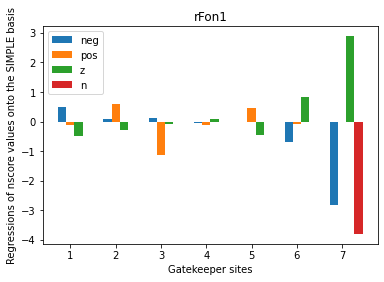

In [146]:
rFon1_flat = list(rFon1.flatten())
ind = np.arange(n_sites)  # x-axis
width = 0.18  # unsure why this value?

# generate y values
sitesxdim = n_sites * n_dim
y_vals = []
for i in range(n_dim):
    curr_y = [rFon1_flat[j] for j in range(i, sitesxdim, n_dim)]
    y_vals.append(curr_y)

# generate figure
fig, ax = plt.subplots()

bars = []
for i in range(n_dim):
    curr_bar = ax.bar(ind + i * width, y_vals[i], width)
    bars.append(curr_bar)

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1, n_sites + 1))

# generate legend
bar_legend = ()
for i in range(n_dim):
    bar_legend = bar_legend + (bars[i][0],)
ax.legend(bar_legend, dims)

# Title, Labels, etc.
plt.xlabel(site_desc)
y_label = "Regressions of " + phenotype + " values onto the SIMPLE basis"
plt.ylabel(y_label)
plt.title("rFon1")

plt.savefig(out_dir + "rFon1.png", dpi=400)

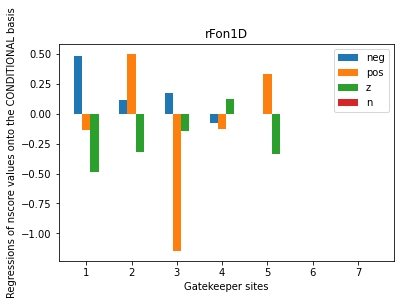

In [147]:
rFon1D_flat = list(rFon1D.flatten())
ind = np.arange(n_sites)  # x-axis
width = 0.18  # unsure why this value?

# generate y values
sitesxdim = n_sites * n_dim
y_vals = []
for i in range(n_dim):
    curr_y = [rFon1D_flat[j] for j in range(i, sitesxdim, n_dim)]
    y_vals.append(curr_y)

# generate figure
fig, ax = plt.subplots()

bars = []
for i in range(n_dim):
    curr_bar = ax.bar(ind + i * width, y_vals[i], width)
    bars.append(curr_bar)

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1, n_sites + 1))

# generate legend
bar_legend = ()
for i in range(n_dim):
    bar_legend = bar_legend + (bars[i][0],)
ax.legend(bar_legend, dims)

# Title, Labels, etc.
plt.xlabel(site_desc)
y_label = "Regressions of " + phenotype + " values onto the CONDITIONAL basis"
plt.ylabel(y_label)
plt.title("rFon1D")
plt.savefig(out_dir + "rFon1D.png", dpi=400)

## Second order regressions (rFon2D)

In [148]:
rFon2D = regressions[data_file_prefix + "_rFon2D"]
print(rFon2D.shape)  # (n_sites, n_sites, n_dim, n_dim)
rFon2D

(7, 7, 4, 4)


array([[[[  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        ,   0.        ],
         [ -0.46940659,   0.        ,   0.46940659,   0.        ],
         [  0.        ,   0.        ,   0.        ,   0.

In [149]:
# to look at a pair of sites, rFon2D[site 1][site 2] = shape (n_dim, n_dim)
rFon2D[0][0]

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [150]:
# extract all of the rFon2D pairs of unique sites and concatenate them
n_pairs = comb(n_sites, 2)

unique_rFon2D = []
pairs_list = []

for i in range(n_sites):
    for j in range(n_sites):
        if j > i:
            pairs_list.append((i, j))
            this_rFon2D = rFon2D[i][j]
            unique_rFon2D.append(this_rFon2D)

concat = np.concatenate(unique_rFon2D)
concat.shape  # should be (n_pairs * n_dim, n_dim)

(84, 4)

In [151]:
abs_max_val = abs(concat.max())
abs_max_val

110.56183435459454

In [152]:
# scale each value in each of the matrices above by the max_val
scaled_rFon2D = []

for i in range(n_pairs):
    scaled = unique_rFon2D[i] * (1 / abs_max_val)
    scaled_rFon2D.append(scaled)

### Look at a specific 2nd order interaction (heatmap) between two sites

In [153]:
# CHOOSE SITE PAIR OF INTEREST
first_site = 3
second_site = 2

In [154]:
if first_site < second_site:
    pair = pairs_list.index((first_site, second_site))
    smaller_site = first_site
    larger_site = second_site
elif first_site > second_site:
    pair = pairs_list.index((second_site, first_site))
    smaller_site = second_site
    larger_site = first_site
else:
    print("pairs have to be different numbers")

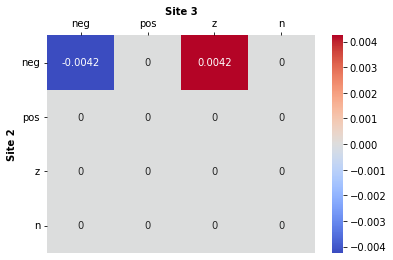

In [155]:
ax = sns.heatmap(
    scaled_rFon2D[pair],
    annot=True,
    cmap="coolwarm",
    annot_kws={"size": 10},
    center=0,
    square=False,
)
column_labels = dims
row_labels = dims
plt.yticks(rotation=0)
ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
ax.set_xlabel(f"Site {larger_site}", weight="bold")  # Larger site
ax.xaxis.set_label_position("top")
ax.set_ylabel(f"Site {smaller_site}", weight="bold")  # Smaller site
ax.xaxis.tick_top()
figure = ax.get_figure()

In [156]:
scaled_rFon2D[pair]

array([[-0.00424565,  0.        ,  0.00424565,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

### Generate and save all second order interactions (heatmaps).

/var/folders/zb/wggq66s94jjdy4wx3vr2gnt00000gq/T/ipykernel_41101/4211883761.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


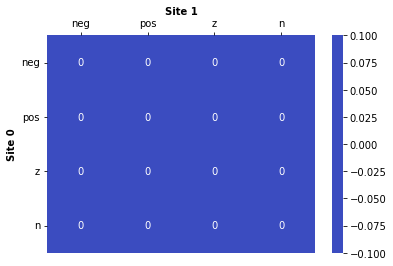

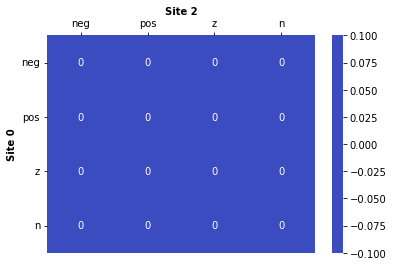

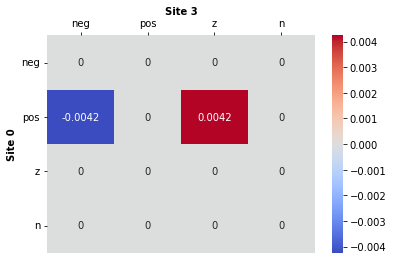

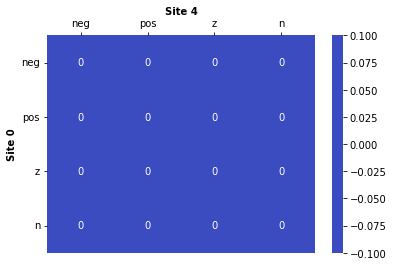

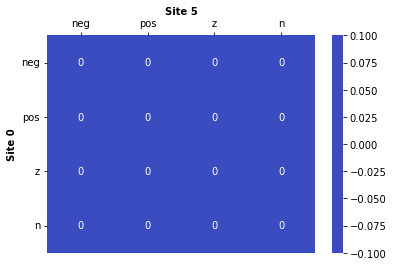

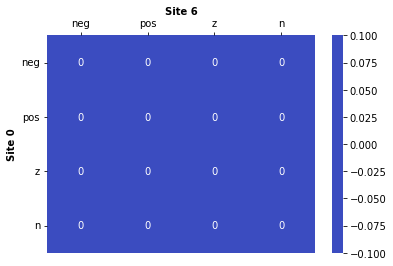

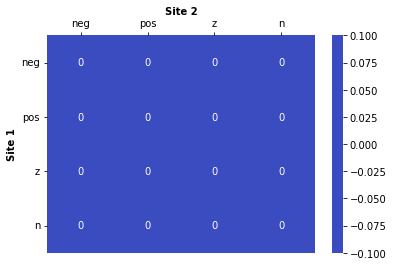

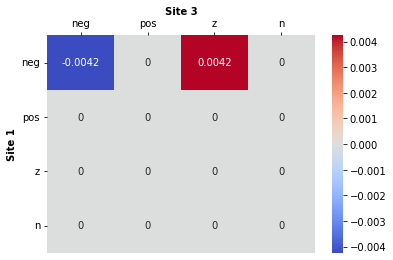

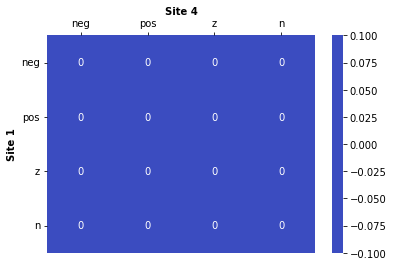

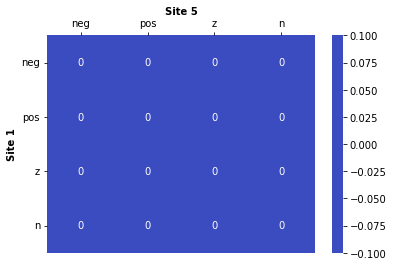

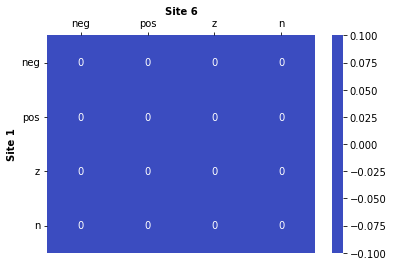

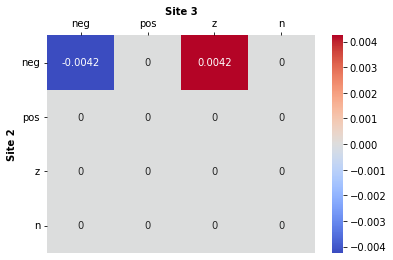

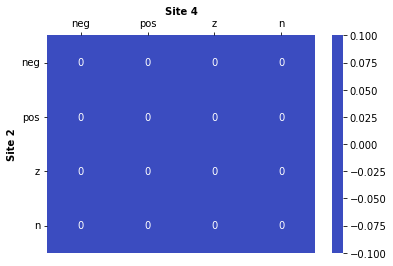

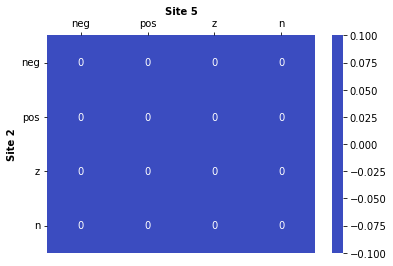

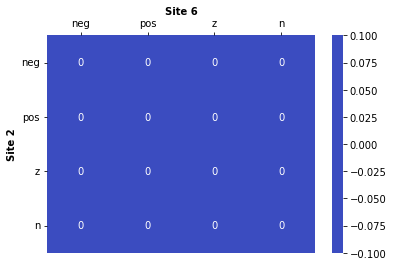

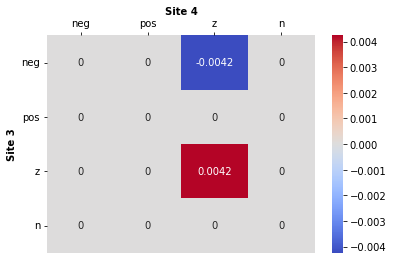

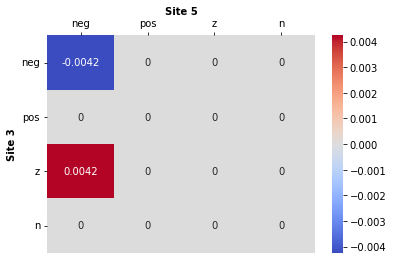

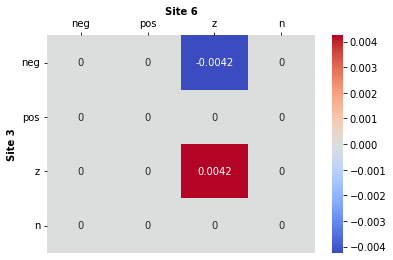

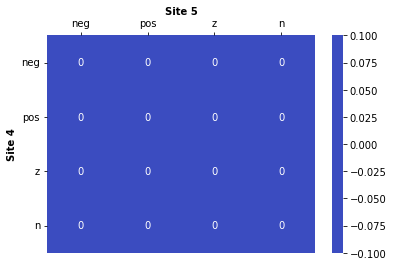

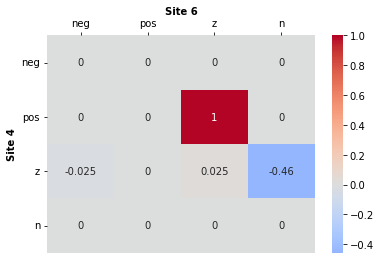

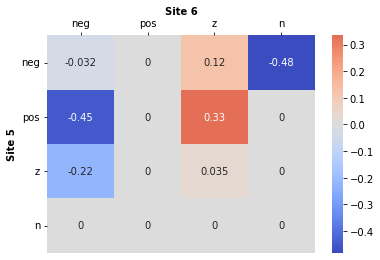

In [128]:
for i in range(n_pairs):
    # pick the pair
    curr_pair = pairs_list[i]
    smaller_site = curr_pair[0]
    larger_site = curr_pair[1]

    # generate the figure
    plt.figure()
    ax = sns.heatmap(
        scaled_rFon2D[i],
        annot=True,
        cmap="coolwarm",
        annot_kws={"size": 10},
        center=0,
        square=False,
    )
    column_labels = dims
    row_labels = dims
    plt.yticks(rotation=0)
    ax.set_xticklabels(column_labels, minor=False)
    ax.set_yticklabels(row_labels, minor=False)
    ax.set_xlabel(f"Site {larger_site}", weight="bold")  # Larger site
    ax.xaxis.set_label_position("top")
    ax.set_ylabel(f"Site {smaller_site}", weight="bold")  # Smaller site
    ax.xaxis.tick_top()
    figure = ax.get_figure()

    # save the figure
    figure_title = "site" + str(smaller_site) + "w" + str(larger_site) + "_scaled.png"
    figure.savefig(out_dir + figure_title, dpi=400)

## Scratch work

Whatever is below this, I'm saving for just in case!

Text(0.5, 1.0, 'rFon1D')

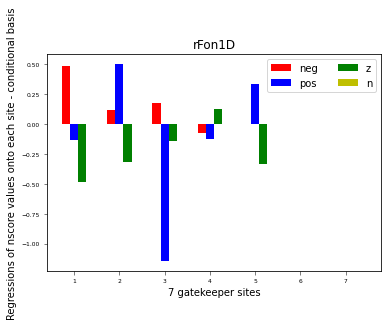

In [29]:
rFon1D_flat = list(rFon1D.flatten())
ind = np.arange(n_sites)  # x-axis
width = 0.18  # why this value?

# y values
sitesxdim = n_sites * n_dim
neg_dim = [rFon1D_flat[i] for i in range(0, sitesxdim, n_dim)]
pos_dim = [rFon1D_flat[i] for i in range(1, sitesxdim, n_dim)]
un_dim = [rFon1D_flat[i] for i in range(2, sitesxdim, n_dim)]
pad_dim = [rFon1D_flat[i] for i in range(3, sitesxdim, n_dim)]

fig, ax = plt.subplots()

p0 = ax.bar(ind, neg_dim, width, color="r")
p1 = ax.bar(ind + width, pos_dim, width, color="b")
p2 = ax.bar(ind + 2 * width, un_dim, width, color="g")
p3 = ax.bar(ind + 3 * width, pad_dim, width, color="y")

ax.set_xticks(ind + width)
ax.set_xticklabels(np.arange(1, 8))

ax.legend((p0[0], p1[0], p2[0], p3[0]), dims, ncol=2)
ax.tick_params(
    width=0.5, labelsize=6
)  # width of the tick and the size of the tick labels

plt.xlabel("7 gatekeeper sites")
plt.ylabel("Regressions of nscore values onto each site - conditional basis")
plt.title("rFon1D")